In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Yashasvi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

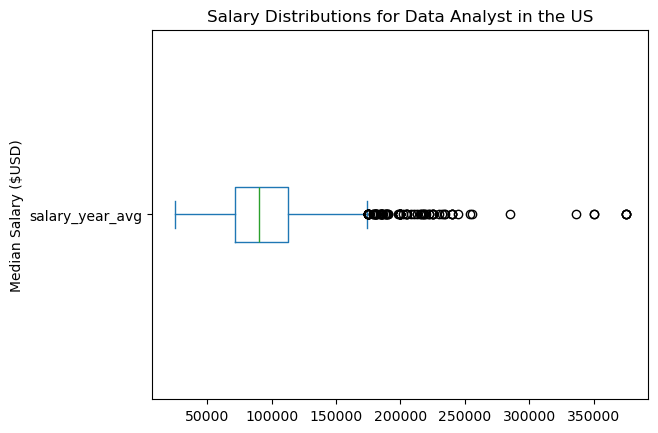

In [7]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
# Alternatively, can use matplotlib
# plt.boxplot(df_DA_US['salary_year_avg'])
plt.title('Salary Distributions for Data Analyst in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()

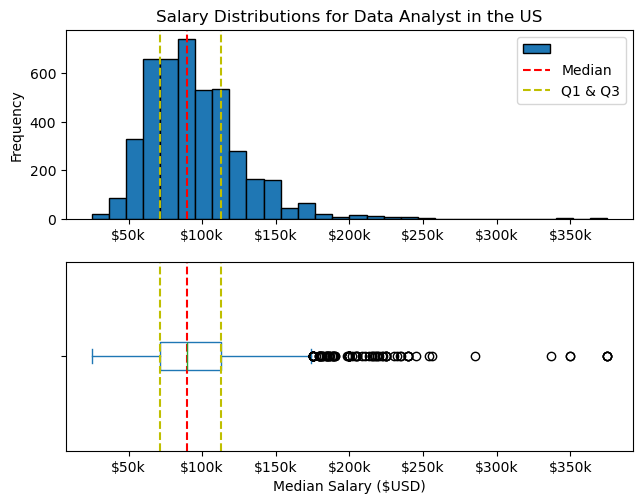

In [23]:
# plot histogram and boxplot for df_DA_US['salary_year_avg'] on same figure

fig, ax = plt.subplots(2,1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='Black', ax=ax[0])
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])

df_DA_US['salary_year_avg'].plot(kind='box', vert= False, ax=ax[1])
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')

plt.show()

In [28]:
# We'll create 3 boxplots for Data Analyst, Data Engineer, and Data Scientist job salaries in the United States.

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset='salary_year_avg')

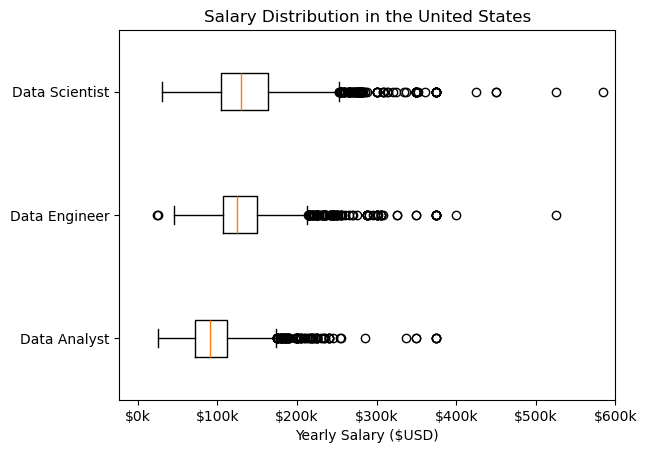

In [38]:
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, vert=False, tick_labels=job_titles)
plt.xlim(right=600000)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
plt.show()

Comparison Between the Charts
Range and Outliers: Data engineers and data scientists tend to have higher salary ranges and more significant outliers compared to data analysts. This suggests that roles in engineering and science are potentially more lucrative and vary more in compensation.
Median and IQR: The median salaries for data engineers and scientists are higher than for analysts. The spread of salaries (IQR) is also broader for engineers, indicating a wider variance in pay within this role.
Overall Trend: The progression from analyst to engineer to scientist shows a trend of increasing salary medians and upper ranges, reflecting higher compensation with increased specialization and skills within the data field.